# Разведочный анализ данных
Выполнил: Бабак З. О.

Учебная группа: Б23-215

# Подключение библиотек
Подключаем необходимые библиотеки для работы с набором данных, графиками и математической статистикой

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Первичный анализ
Проведем первичный анализ, загрузив данные из файла (файл взят с сайта Kaggle). Посмотрим на вид таблицы, какие столбцы в ней содержатся, какой тип имеют данные в столбцах, имеются ли пропуски, некоторые статистические показатели.

In [41]:
df = pd.read_csv('student_depression_dataset.csv')
df.shape

(27901, 18)

In [11]:
df.head(6)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [13]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [14]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Как видим, в датасете отсутствуют пропуски.

# Основной анализ

Посмотрим, сколько людей из общего числа имеют депрессию.

In [66]:
all_amount = len(df.loc[df["Depression"] == 1])
percents = len(df.loc[df["Depression"] == 1])/len(df)*100
print(f"Число человек с депрессией: {all_amount}, это примерно {percents:.2f} процентов от общего числа")

Число человек с депрессией: 16336, это примерно 58.55 процентов от общего числа


<Axes: >

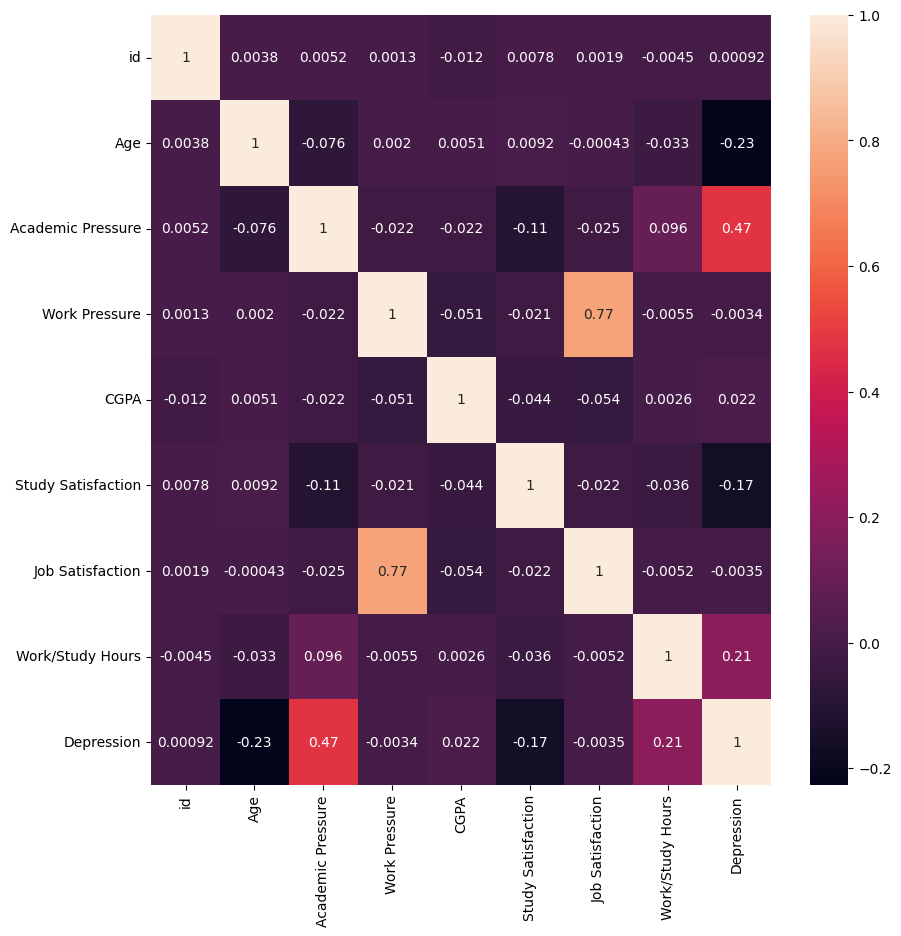

In [46]:
df_corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True)

Видим, что наибольшая кореляция у целевой переменной "Depression" с параметром академическое давление. Среди остальных параметров, наблюдается некоторая корреляция с отношением часов учебы к часам работы, а также обратная корреляция с возрастом и удовлетворенностью учебой.

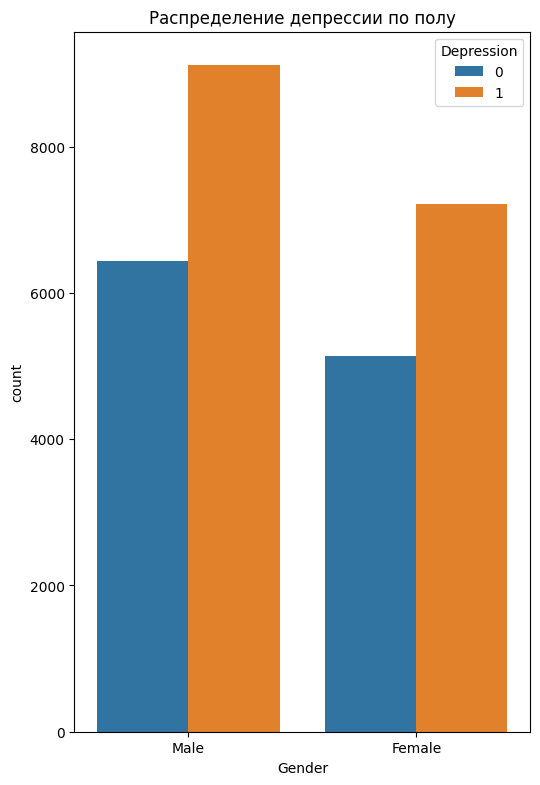

In [16]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Распределение депрессии по полу')
plt.show()

По данному графику видим, что число мужчин с депрессией выше. Но стоит проверить количственное соотношение мужчин и женщин в наборе данных.

In [90]:
print("Число мужчин:", len(df.loc[df["Gender"] == "Male"]))
print("Число женщин:", len(df.loc[df["Gender"] == "Female"]))

Число мужчин: 15547
Число женщин: 12354


Женщин примерно на 20% меньше, поэтому посчитаем отношение людей с депрессией к общему числу для каждого пола для более объективного анализа.

In [92]:
print("Доля депрессии среди мужчин:", (df.loc[df["Gender"] == "Male"]["Depression"].sum())/15547)
print("Доля депрессии среди женщин:", (df.loc[df["Gender"] == "Female"]["Depression"].sum())/12354)

Доля депрессии среди мужчин: 0.5862867434231684
Доля депрессии среди женщин: 0.5845070422535211


Видим, что в процентном соотношении количество мужчин и женщин с депрессией примерно одинакого.

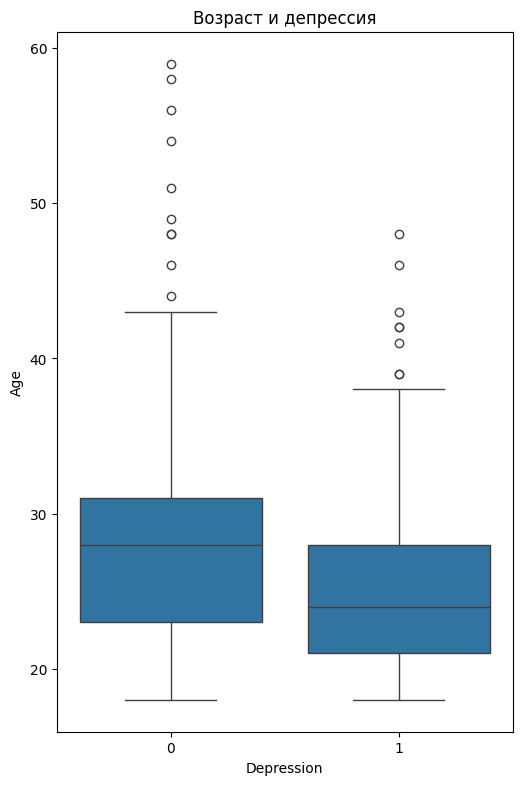

In [49]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='Depression', y='Age')
plt.title('Возраст и депрессия')
plt.show()

По данному ящику с усами заключаем, что медиана возраста для людей с депрессией около 24-25 лет, для людей без депрессии — около 28 лет. Возраста выше 38 и 43 лет являются выбросами для людей с депрессией и без депрессии соответственно.

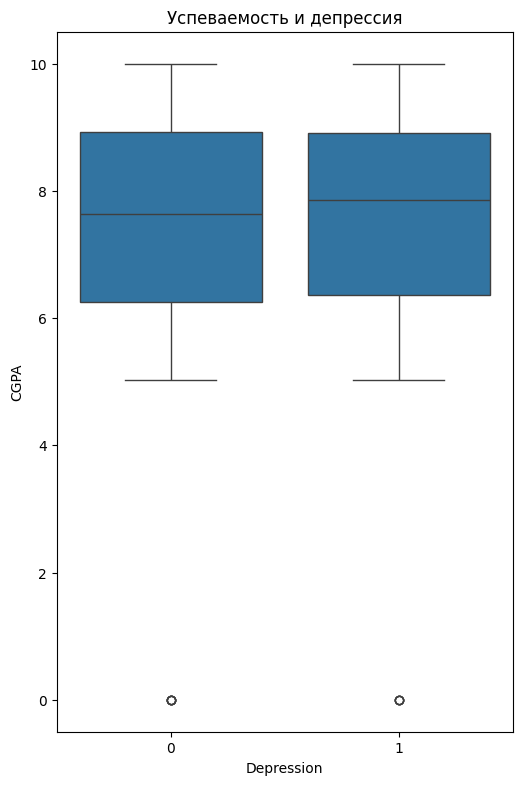

In [50]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Depression', y='CGPA')
plt.title('Успеваемость и депрессия')
plt.show()

Можем сделать вывод, что для людей с депрессией и без депрессии такие статистические параметры успеваемости студентов, как медиана, верхний и нижный квантили примерно одинаковы, а также не имеется выбросов.

Попробуем посмотреть, как влияют академическая нагрузка и нагрузка на работе на наличие депрессии. Посчитаем и сравним среднее значение каждого параметра отдельно для людей с депрессией и без.

In [94]:
print("Среднее давление на учебе у людей с депрессией:", df.loc[df['Depression'] == 1.0]['Academic Pressure'].mean())
print("Среднее давление на учебе у людей без депрессии:", df.loc[df['Depression'] == 0.0]['Academic Pressure'].mean())
print("Среднее давление на работе у людей с депрессией:", df.loc[df['Depression'] == 1.0]['Work Pressure'].mean())
print("Среднее давление на работе у людей без депрессии:", df.loc[df['Depression'] == 0.0]['Work Pressure'].mean())

Среднее давление на учебе у людей с депрессией: 3.693131733594515
Среднее давление на учебе у людей без депрессии: 2.361608300907912
Среднее давление на работе у людей с депрессией: 0.0003060724779627816
Среднее давление на работе у людей без депрессии: 0.0006052745352356247


Таким образом, уровень нагрузки на работе фактически не влияет на наличие депрессии. А вот учебная нагрузка у людей с депрессией примерно в полтора раза выше, чем у людей без депрессии.

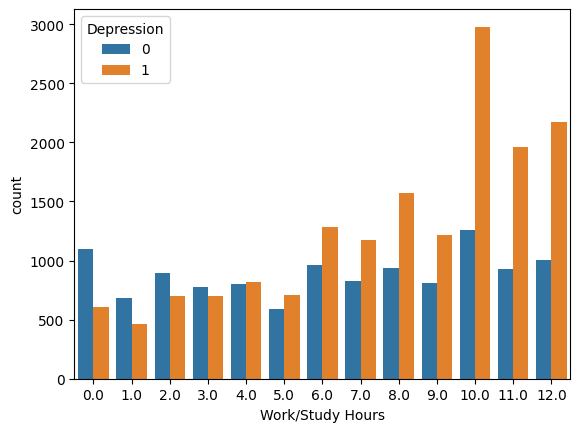

In [20]:
sns.countplot(df, x='Work/Study Hours', hue='Depression')
plt.show()

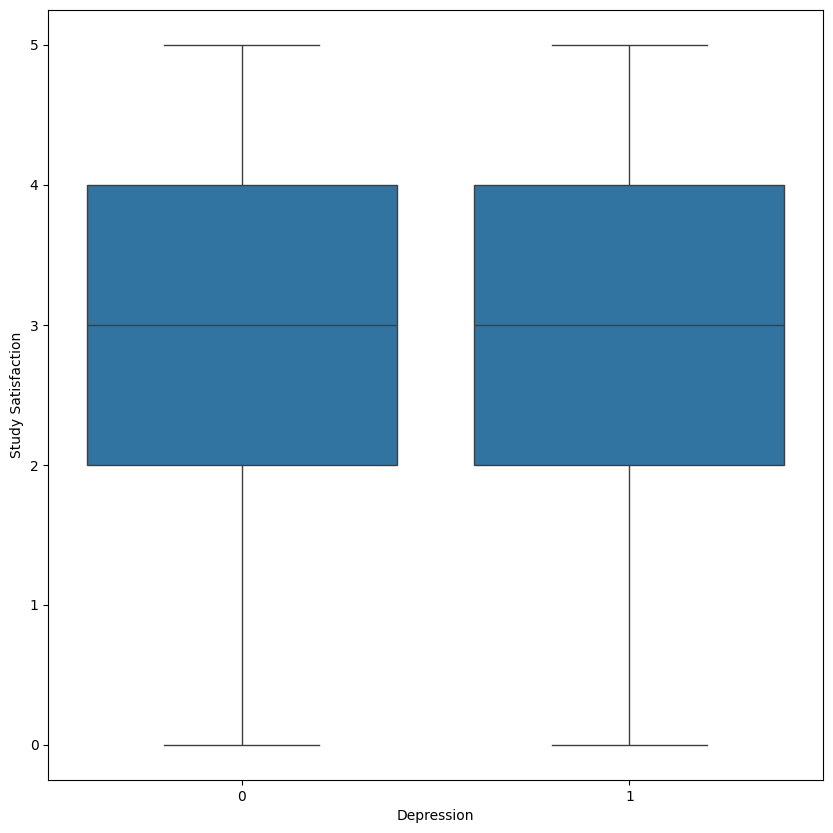

In [21]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='Depression', y='Study Satisfaction')
plt.show()

Выясним, сколько представителей различных профессий имеется в наборе данных.

In [54]:
profession_depression = df.groupby('Profession')['Profession'].count()
print(profession_depression)

Profession
'Civil Engineer'                1
'Content Writer'                2
'Digital Marketer'              3
'Educational Consultant'        1
'UX/UI Designer'                1
Architect                       8
Chef                            2
Doctor                          2
Entrepreneur                    1
Lawyer                          1
Manager                         1
Pharmacist                      2
Student                     27870
Teacher                         6
Name: Profession, dtype: int64


Как видим, датасет практически не содержит профессий помимо студента, следовательно изучать зависимости целевой переменной от профессии нецелесообразно.

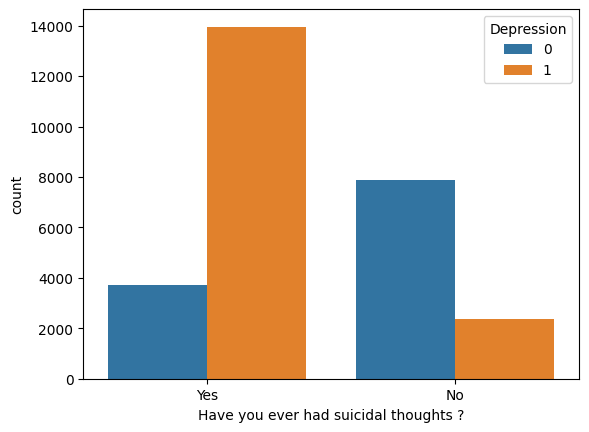

In [23]:
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?', hue='Depression')
plt.show()

Таким образом, у примерно 14000 человек из чуть больше чем 16000 с депрессией возникали суицидальные мысли.

# Статистический анализ
Проверим несколько стастических гипотез.

**Гипотеза 1**

Посмотрим, как отличаются средние баллы у студентов с депрессией и без. Выдвинем предположение: успеваемость студентов с депрпессией выше, чем у студентов без депрессии.

Для использования t-критерия нужно, чтобы данные имели нормальное распределение. Посмотрим на распределение на графике, а также реализуем проверку в коде (аналогично для последующих гепотиз).

<Axes: xlabel='CGPA', ylabel='Count'>

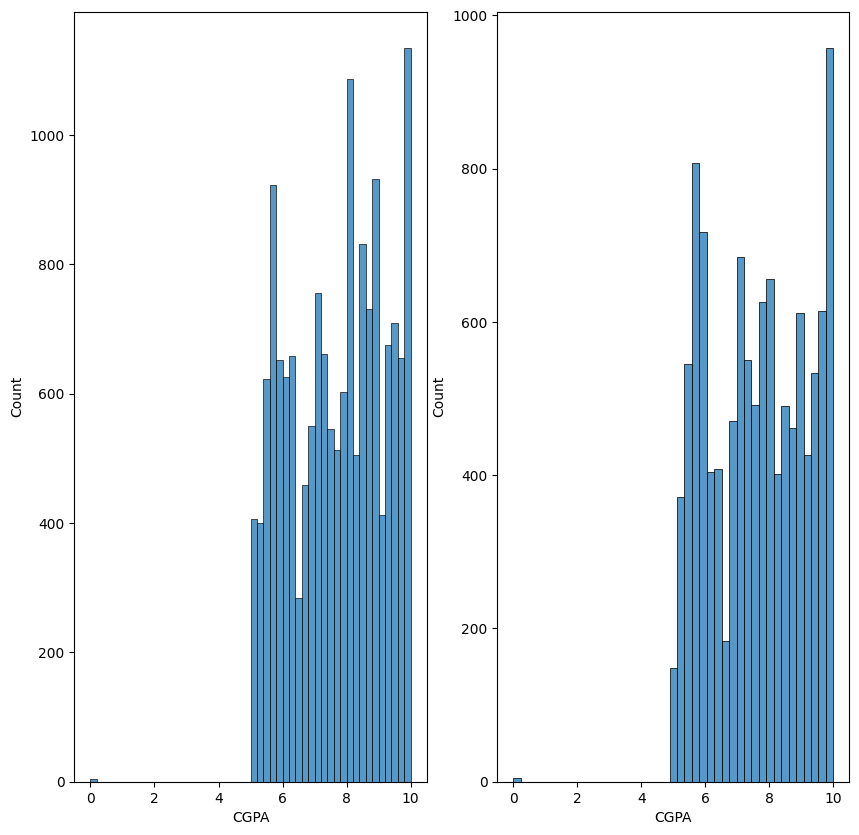

In [72]:
df_cgpa_depression = df.loc[df["Depression"] == 1]["CGPA"]
df_cgpa_no_depression = df.loc[df["Depression"] == 0]["CGPA"]
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
sns.histplot(df_cgpa_depression)
plt.subplot(1, 2, 2)
sns.histplot(df_cgpa_no_depression)

Как видно из графика, значения имеют распределение, отличное от нормального. Поэтому для проверки гипотезы будем использовать U-тест Манна-Уитни.

In [75]:
group_depression = df[df["Depression"] == 1]["CGPA"]
group_no_depression = df[df["Depression"] == 0]["CGPA"]

# Проверка на нормальность распределения
norm_test_dep = stats.shapiro(group_depression)
norm_test_no_dep = stats.shapiro(group_no_depression)

print(f"\nТест Шапиро-Уилка на нормальность:")
print(f"Группа с депрессией: p-value = {norm_test_dep.pvalue:.4f}")
print(f"Группа без депрессии: p-value = {norm_test_no_dep.pvalue:.4f}")

# Проверка равенства дисперсий (Левен)
levene_test = stats.levene(group_depression, group_no_depression)
print(f"\nТест Левена на равенство дисперсий: p-value = {levene_test.pvalue:.4f}")

# Выбор статистического теста
if norm_test_dep.pvalue > 0.05 and norm_test_no_dep.pvalue > 0.05:
    # Если распределения нормальные - используем t-тест
    t_stat, p_value = stats.ttest_ind(group_depression, group_no_depression, 
                                      equal_var=levene_test.pvalue > 0.05,
                                      alternative='greater')
    test_used = "t-тест"
else:
    # Если распределения не нормальные - используем U-тест Манна-Уитни
    u_stat, p_value = stats.mannwhitneyu(group_depression, group_no_depression, 
                                        alternative='greater')
    test_used = "U-тест Манна-Уитни"

print(f"\nИспользованный тест: {test_used}")
print(f"p-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Результат: Отвергаем нулевую гипотезу")
    print("Вывод: Успеваемость студентов с депрессией СТАТИСТИЧЕСКИ ЗНАЧИМО выше")
else:
    print("Результат: Принимаем нулевую гипотезу")
    print("Вывод: Нет статистически значимых различий в успеваемости")


Тест Шапиро-Уилка на нормальность:
Группа с депрессией: p-value = 0.0000
Группа без депрессии: p-value = 0.0000

Тест Левена на равенство дисперсий: p-value = 0.0001

Использованный тест: U-тест Манна-Уитни
p-value: 0.0001
Результат: Отвергаем нулевую гипотезу
Вывод: Успеваемость студентов с депрессией СТАТИСТИЧЕСКИ ЗНАЧИМО выше


c:\Users\12\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16336.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\12\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11565.
  res = hypotest_fun_out(*samples, **kwds)


**Гипотеза 2**

Выясним, как влияет соотношение часов работы и учебы на наличие депрессии. Выдвинем предположение: коэффициент Work/Study hours у людей с депрессией выше.

In [78]:
group_depression = df[df["Depression"] == 1]["Work/Study Hours"]
group_no_depression = df[df["Depression"] == 0]["Work/Study Hours"]

# Проверка на нормальность распределения
norm_test_dep = stats.shapiro(group_depression)
norm_test_no_dep = stats.shapiro(group_no_depression)

print(f"\nТест Шапиро-Уилка на нормальность:")
print(f"Группа с депрессией: p-value = {norm_test_dep.pvalue:.4f}")
print(f"Группа без депрессии: p-value = {norm_test_no_dep.pvalue:.4f}")

# Проверка равенства дисперсий (Левен)
levene_test = stats.levene(group_depression, group_no_depression)
print(f"\nТест Левена на равенство дисперсий: p-value = {levene_test.pvalue:.4f}")

# Выбор статистического теста
if norm_test_dep.pvalue > 0.05 and norm_test_no_dep.pvalue > 0.05:
    # Если распределения нормальные - используем t-тест
    t_stat, p_value = stats.ttest_ind(group_depression, group_no_depression, 
                                      equal_var=levene_test.pvalue > 0.05,
                                      alternative='greater')
    test_used = "t-тест"
else:
    # Если распределения не нормальные - используем U-тест Манна-Уитни
    u_stat, p_value = stats.mannwhitneyu(group_depression, group_no_depression, 
                                        alternative='greater')
    test_used = "U-тест Манна-Уитни"

print(f"\nИспользованный тест: {test_used}")
print(f"p-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Результат: Отвергаем нулевую гипотезу")
    print("Вывод: соотношение часов работы и учебы у студентов с депрессией СТАТИСТИЧЕСКИ ЗНАЧИМО выше")
else:
    print("Результат: Принимаем нулевую гипотезу")
    print("Вывод: Нет статистически значимых различий в соотношении часов работы и учебы")


Тест Шапиро-Уилка на нормальность:
Группа с депрессией: p-value = 0.0000
Группа без депрессии: p-value = 0.0000

Тест Левена на равенство дисперсий: p-value = 0.0000

Использованный тест: U-тест Манна-Уитни
p-value: 0.0000
Результат: Отвергаем нулевую гипотезу
Вывод: соотношение часов работы и учебы у студентов с депрессией СТАТИСТИЧЕСКИ ЗНАЧИМО выше


**Гипотеза 3**

Выясним, как влияет удовлетворение учебой на наличие депрессии. Выдвинем предположение: коэффициент Study satisfaction у людей с депрессией выше.

In [80]:
group_depression = df[df["Depression"] == 1]["Study Satisfaction"]
group_no_depression = df[df["Depression"] == 0]["Study Satisfaction"]

# Проверка на нормальность распределения
norm_test_dep = stats.shapiro(group_depression)
norm_test_no_dep = stats.shapiro(group_no_depression)

print(f"\nТест Шапиро-Уилка на нормальность:")
print(f"Группа с депрессией: p-value = {norm_test_dep.pvalue:.4f}")
print(f"Группа без депрессии: p-value = {norm_test_no_dep.pvalue:.4f}")

# Проверка равенства дисперсий (Левен)
levene_test = stats.levene(group_depression, group_no_depression)
print(f"\nТест Левена на равенство дисперсий: p-value = {levene_test.pvalue:.4f}")

# Выбор статистического теста
if norm_test_dep.pvalue > 0.05 and norm_test_no_dep.pvalue > 0.05:
    # Если распределения нормальные - используем t-тест
    t_stat, p_value = stats.ttest_ind(group_depression, group_no_depression, 
                                      equal_var=levene_test.pvalue > 0.05,
                                      alternative='greater')
    test_used = "t-тест"
else:
    # Если распределения не нормальные - используем U-тест Манна-Уитни
    u_stat, p_value = stats.mannwhitneyu(group_depression, group_no_depression, 
                                        alternative='greater')
    test_used = "U-тест Манна-Уитни"

print(f"\nИспользованный тест: {test_used}")
print(f"p-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Результат: Отвергаем нулевую гипотезу")
    print("Вывод: удовлетворенность учебой у студентов с депрессией СТАТИСТИЧЕСКИ ЗНАЧИМО выше")
else:
    print("Результат: Принимаем нулевую гипотезу")
    print("Вывод: Нет статистически значимых различий в удовлетворенности учебой")



Тест Шапиро-Уилка на нормальность:
Группа с депрессией: p-value = 0.0000
Группа без депрессии: p-value = 0.0000

Тест Левена на равенство дисперсий: p-value = 0.0003

Использованный тест: U-тест Манна-Уитни
p-value: 1.0000
Результат: Принимаем нулевую гипотезу
Вывод: Нет статистически значимых различий в удовлетворенности учебой


c:\Users\12\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16336.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\12\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 11565.
  res = hypotest_fun_out(*samples, **kwds)


**Гипотеза 4**

Выясним, у какого пола после 30 лет депрессия втречается чаще. Выдвинем предположение: после 30 лет у мужчин депрессия встречается чаще.

In [84]:
# Фильтрация данных: возраст > 30 лет
data_over_30 = df[df['Age'] > 30]

# Создание кросс-таблицы для пола и депрессии
contingency_table = pd.crosstab(
    data_over_30['Gender'], 
    data_over_30['Depression']
)

print("Кросс-таблица (пол vs депрессия):")
print(contingency_table)

# Проверка условия для теста (все ожидаемые частоты >= 5)
if contingency_table.shape == (2, 2) and (contingency_table.values >= 5).all():
    # Критерий хи-квадрат
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    test_used = "Хи-квадрат"
else:
    # Точный тест Фишера для малых выборок
    from scipy.stats import fisher_exact
    odds_ratio, p_value = fisher_exact(contingency_table)
    test_used = "Точный тест Фишера"

print(f"\nИспользованный тест: {test_used}")
print(f"p-value: {p_value:.4f}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим. Отвергаем нулевую гипотезу.")
    # Сравнение долей
    male_depression_rate = contingency_table.loc['Male', 1] / contingency_table.loc['Male'].sum()
    female_depression_rate = contingency_table.loc['Female', 1] / contingency_table.loc['Female'].sum()
    print(f"Доля депрессии у мужчин: {male_depression_rate:.2f}")
    print(f"Доля депрессии у женщин: {female_depression_rate:.2f}")
    if male_depression_rate > female_depression_rate:
        print("Гипотеза подтверждается: у мужчин депрессия встречается чаще.")
    else:
        print("Гипотеза не подтверждается.")
else:
    print("Результат не значим. Нет оснований отвергать нулевую гипотезу.")

Кросс-таблица (пол vs депрессия):
Depression     0     1
Gender                
Female      1511  1093
Male        2094  1401

Использованный тест: Хи-квадрат
p-value: 0.1451
Результат не значим. Нет оснований отвергать нулевую гипотезу.


Как видим, тест показал, что результат не значим, но мужчин с депрессией после 30 больше, чем женщин. Поверим соотношение долей.

In [97]:
male_depression_rate = contingency_table.loc['Male', 1] / contingency_table.loc['Male'].sum()
female_depression_rate = contingency_table.loc['Female', 1] / contingency_table.loc['Female'].sum()
print("Доля мужчин после 30 лет с депрессией:", male_depression_rate)
print("Доля женщин после 30 с депрессией:", female_depression_rate)

Доля мужчин после 30 лет с депрессией: 0.4008583690987124
Доля женщин после 30 с депрессией: 0.4197388632872504


Доли практически совпадают, что и привело к тому, что тест не выявил статистической значимости.